DE CORDOUE-HECQUARD Grégoire 2508857

<div style="background-color: purple; padding: 10px;">
<h1 style ='color: white;'> Titanic Data Exploration </h1>
</div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [287]:
sns.set_theme()
df = pd.read_csv("titanic_clean.csv")
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
476,477,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S


<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> Dataset Overview </h2>
</div>

### Q1) How many passengers are in the dataset? What columns are available for analysis?

In [6]:
df[["PassengerId", "Survived","Pclass"]].head()

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


In [7]:
df.shape

(891, 12)

In [8]:
len(df)

891

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
type(df.values)

numpy.ndarray

### Q2) Count passengers by Sex, Pclass, and Embarked.

In [12]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [13]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [14]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
type(df["Embarked"].value_counts())

pandas.core.series.Series

In [17]:
pd.DataFrame(df["Embarked"].value_counts()).reset_index()

,Embarked,count
0,S,644
1,C,168
2,Q,77


### Q3) Describe the distribution of Age (mean, median, min, max, missing values).

In [18]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


50% is median of column  
25% of data is less than nb

In [20]:
df["Age"].min()

0.42

In [21]:
df["Age"].max()

80.0

In [22]:
df["Age"].mean()

29.69911764705882

In [23]:
df["Age"].quantile(0.5) #median

28.0

In [24]:
df["Age"].quantile(0.25)

20.125

<Axes: xlabel='Age', ylabel='Count'>

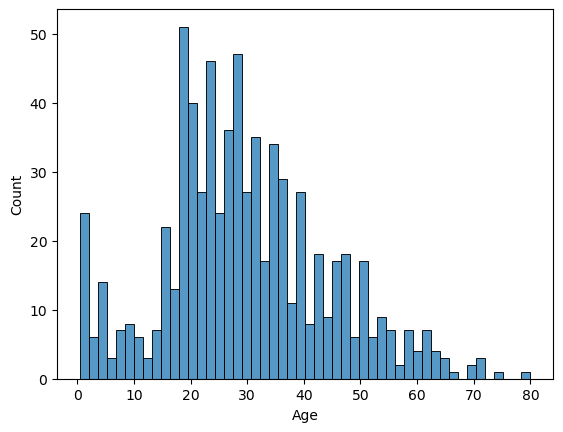

In [25]:
sns.histplot(data=df, x="Age", bins=50)

<Axes: xlabel='Age', ylabel='Count'>

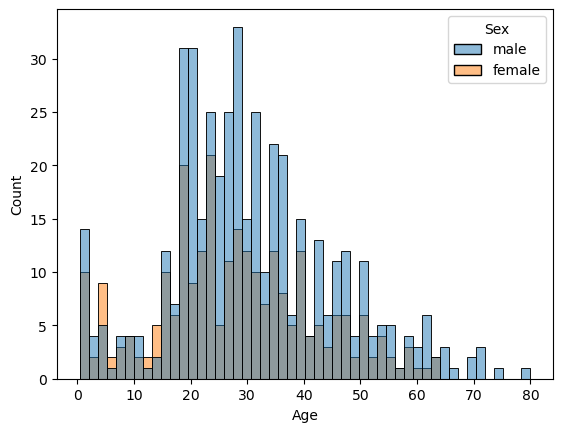

In [26]:
sns.histplot(data=df, x="Age", bins=50, hue="Sex")

<Axes: xlabel='Age', ylabel='Density'>

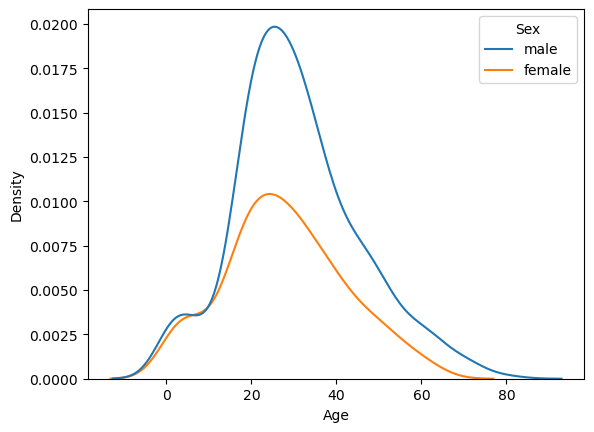

In [27]:
sns.kdeplot(data=df, x="Age", hue="Sex")

<Axes: ylabel='Age'>

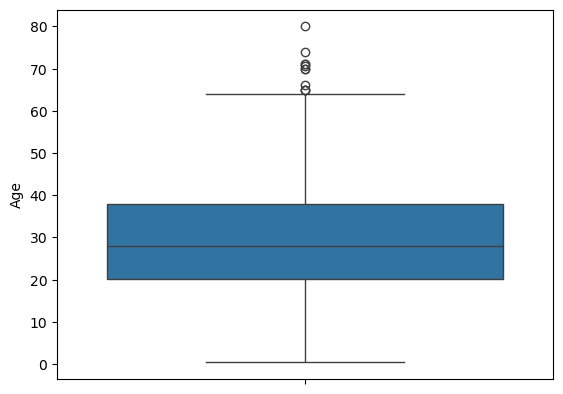

In [28]:
sns.boxplot(data=df, y="Age")

middle line = median value  
viskers = 2 lines  
dots = extreme values  

How to find viskers?  
interquartile range IQR = Q3 - Q1 (Q2 is median, the lines are quartiles)  
lower band = Q1 - 1.5 x IQR  
upper band = Q3 + 1.5 x IQR

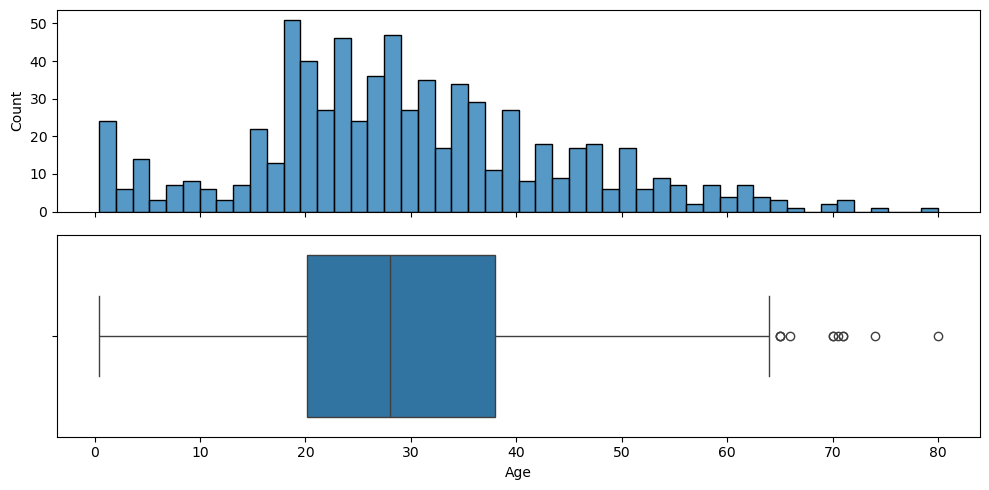

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
sns.histplot(data=df, x="Age", bins=50, ax=ax[0])
sns.boxplot(data=df, x="Age", ax=ax[1])

plt.tight_layout()

### Q4) Describe the distribution of Fare (mean, median, min, max, outliers).

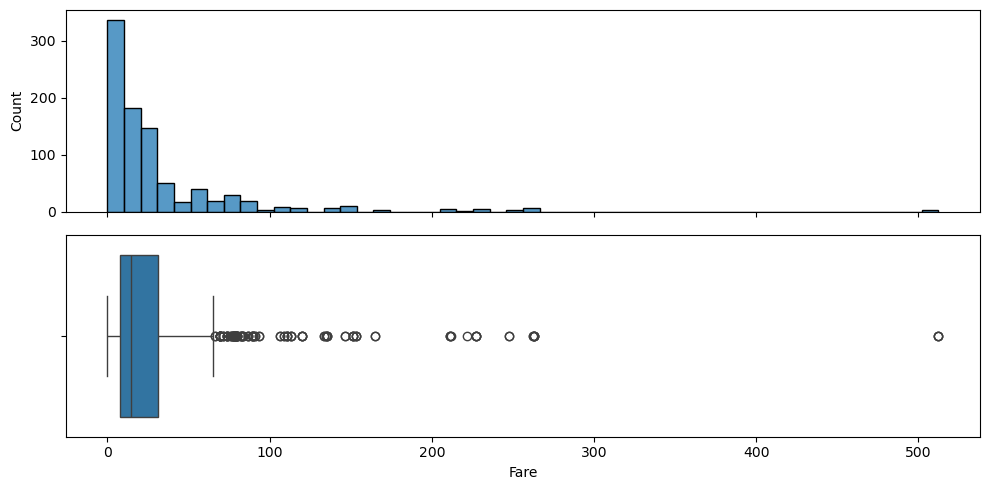

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
sns.histplot(data=df, x="Fare", bins=50, ax=ax[0])
sns.boxplot(data=df, x="Fare", ax=ax[1])
# ax[0].set_xlim([0,100])

plt.tight_layout()

In [32]:
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_ = remove_outliers("Fare")
df_.shape

(775, 12)

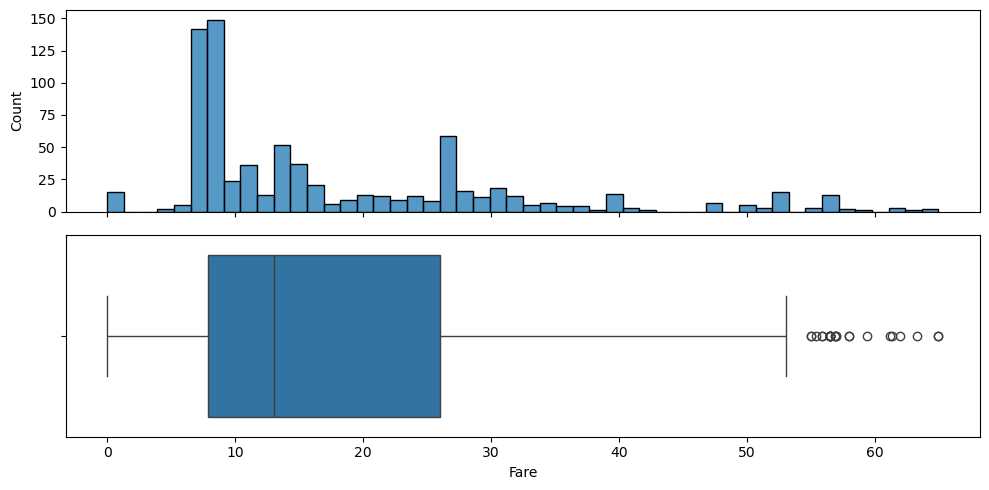

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
sns.histplot(data=df_, x="Fare", bins=50, ax=ax[0])
sns.boxplot(data=df_, x="Fare", ax=ax[1])

plt.tight_layout()

In [34]:
df[df["Pclass"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [35]:
df[(df["Pclass"] == 1) & (df["Age"] >= 30)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S


<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> Survival Patterns </h2>
</div>

In [37]:
round((len(df[df["Survived"] == 1])/len(df))*100, 2)

38.38

### Q1) What is the overall survival rate?

In [39]:
df.groupby(by="Survived", as_index=False)["Survived"].count()

,Survived
0,549
1,342


In [40]:
df["Survived"].value_counts().div(len(df)).mul(100).round(2).reset_index().rename(columns={"count": "Survival_rate"})

,Survived,Survival_rate
0,0,61.62
1,1,38.38


In [41]:
df["Survived"].value_counts().div(len(df)).mul(100).round(2).reset_index(name="Survival_rate (%)")

,Survived,Survival_rate (%)
0,0,61.62
1,1,38.38


### Q2) Compare the survival rate of male vs female passengers.

In [43]:
df.groupby(by="Sex")["Survived"].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [44]:
df.groupby(by="Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [45]:
df.groupby(by="Sex")["Survived"].mean().mul(100).round(2)

Sex
female    74.20
male      18.89
Name: Survived, dtype: float64

Another method:

In [47]:
pd.crosstab(df["Sex"], df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [48]:
pd.crosstab(df["Sex"], df["Survived"]).div(len(df)).mul(100).round(2)

Survived,0,1
Sex,,
female,9.09,26.15
male,52.53,12.23


This is incorrect: we want to divide each number by total nb on line

In [50]:
df_ = pd.crosstab(df["Sex"], df["Survived"], normalize="index").mul(100).round(2).reset_index()
df_

Survived,Sex,0,1
0,female,25.80,74.20
1,male,81.11,18.89


In [51]:
df_long = df_.melt(id_vars="Sex", value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)") #var_name isn't necessary to define here
df_long

,Sex,Survived,Survival rate (%)
0,female,0,25.80
1,male,0,81.11
2,female,1,74.20
3,male,1,18.89


<Axes: xlabel='Sex', ylabel='Survival rate (%)'>

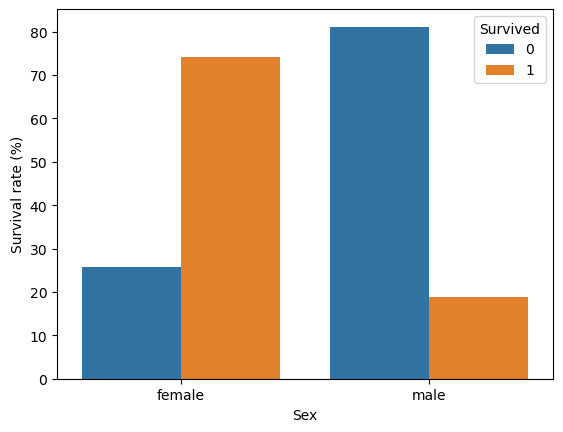

In [52]:
sns.barplot(data=df_long, x="Sex", y="Survival rate (%)", hue="Survived")

### Q3) Compare the survival rate across passenger classes (Pclass = 1, 2, 3).

In [54]:
df_star = pd.crosstab(df["Pclass"], df["Survived"], normalize="index").mul(100).round(2).reset_index()
df_star

Survived,Pclass,0,1
0,1,37.04,62.96
1,2,52.72,47.28
2,3,75.76,24.24


In [55]:
df.groupby(by="Pclass")["Survived"].mean().mul(100).round(2).reset_index()

,Pclass,Survived
0,1,62.96
1,2,47.28
2,3,24.24


In [56]:
df_long2 = df_star.melt(id_vars="Pclass", value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)")
df_long2

,Pclass,Survived,Survival rate (%)
0,1,0,37.04
1,2,0,52.72
2,3,0,75.76
3,1,1,62.96
4,2,1,47.28
5,3,1,24.24


<Axes: xlabel='Pclass', ylabel='Survival rate (%)'>

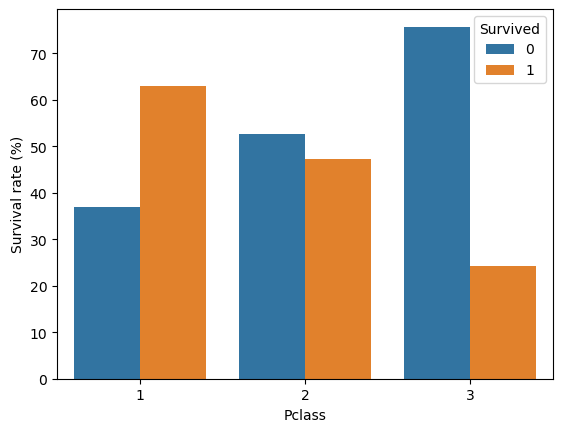

In [57]:
sns.barplot(data=df_long2, x="Pclass", y="Survival rate (%)", hue="Survived")

### Q4) Compare the survival rate across embarkation ports (Embarked = C, Q, S).

In [59]:
df.groupby(by="Embarked")["Survived"].mean().mul(100).round(2).reset_index()

,Embarked,Survived
0,C,55.36
1,Q,38.96
2,S,33.70


In [60]:
df_star2 = pd.crosstab(df["Embarked"], df["Survived"], normalize="index").mul(100).round(2).reset_index()
df_star2

Survived,Embarked,0,1
0,C,44.64,55.36
1,Q,61.04,38.96
2,S,66.30,33.70


In [61]:
df_long3 = df_star2.melt(id_vars="Embarked", value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)")
df_long3

,Embarked,Survived,Survival rate (%)
0,C,0,44.64
1,Q,0,61.04
2,S,0,66.30
3,C,1,55.36
4,Q,1,38.96
5,S,1,33.70


<Axes: xlabel='Embarked', ylabel='Survival rate (%)'>

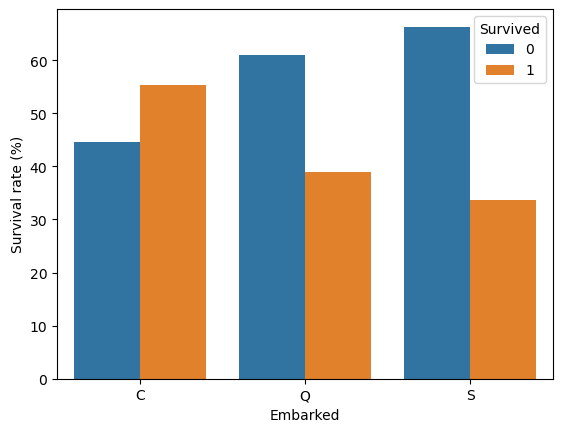

In [62]:
sns.barplot(data=df_long3, x="Embarked", y="Survival rate (%)", hue="Survived")

### Q5) Create an AgeGroup column with categories:

#### a. Child (Age ≤ 14), Adult (15–59), Senior (≥ 60).

In [65]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [66]:
df["Age"] = df["Age"].fillna(value=df["Age"].median()).astype("float")
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [67]:
def get_age_group(age):
    if age <= 14:
        return "Child"
    elif age <= 59:
        return "Adult"
    else:
        return "Senior"

#df["AgeGroup"] = df["Age"].apply(get_age_group)
#df.sample(5)

df["AgeGroup"] = pd.Categorical(values=df["Age"].apply(get_age_group), categories=["Child", "Adult", "Senior"])
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,Adult
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S,Adult
460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,Adult
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C,Adult
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Adult


#### b. Compare survival rates across these groups.

In [69]:
df_star = pd.crosstab(df["AgeGroup"], df["Survived"], normalize="index").mul(100).round(2).reset_index()
df_star

Survived,AgeGroup,0,1
0,Child,41.56,58.44
1,Adult,63.20,36.80
2,Senior,73.08,26.92


In [70]:
df_long = df_star.melt(id_vars="AgeGroup", value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)")
df_long

,AgeGroup,Survived,Survival rate (%)
0,Child,0,41.56
1,Adult,0,63.20
2,Senior,0,73.08
3,Child,1,58.44
4,Adult,1,36.80
5,Senior,1,26.92


<Axes: xlabel='AgeGroup', ylabel='Survival rate (%)'>

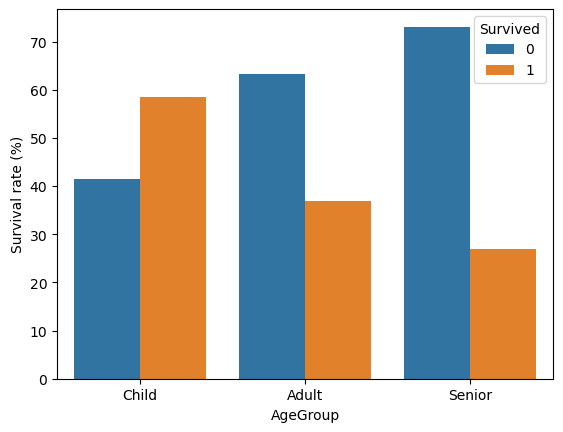

In [71]:
sns.barplot(data=df_long, x="AgeGroup", y="Survival rate (%)", hue="Survived")

### Q6) Compare survival by the combination of Pclass × Sex (e.g., 1st-class women vs 3rd-class men).

In [73]:
c1 = ((df["Pclass"] == 1) & (df["Sex"] == "female"))
c2 = ((df["Pclass"] == 3) & (df["Sex"] == "male"))

df_filtered = df[c1 | c2]
df_filtered.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.05,NaN,S,Adult
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,NaN,S,Adult


In [74]:
df_star1 = pd.crosstab(df_filtered["Pclass"], df_filtered["Survived"], normalize="index").mul(100).round(2).reset_index()
df_star1

Survived,Pclass,0,1
0,1,3.19,96.81
1,3,86.46,13.54


In [75]:
df_long1 = df_star1.melt(id_vars="Pclass", value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)")
df_long1

,Pclass,Survived,Survival rate (%)
0,1,0,3.19
1,3,0,86.46
2,1,1,96.81
3,3,1,13.54


<Axes: xlabel='Pclass', ylabel='Survival rate (%)'>

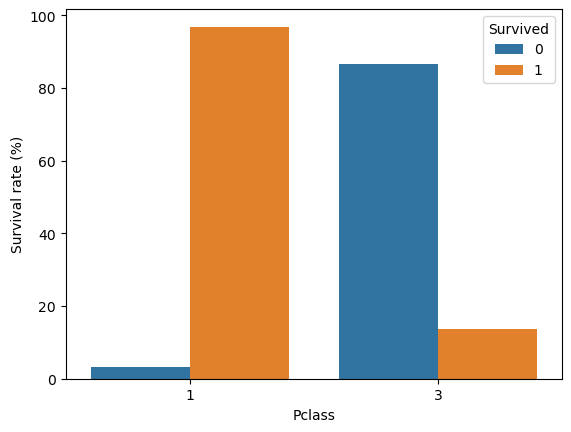

In [76]:
sns.barplot(data=df_long1, x="Pclass", y="Survival rate (%)", hue="Survived")

This shows survival rates only according to Pclass. To show gender as well, we can proceed as below :

In [78]:
df_pxs = pd.crosstab(index = [df["Pclass"], df["Sex"]], columns = df["Survived"], normalize="index").mul(100).round(2).reset_index()
df_pxs

Survived,Pclass,Sex,0,1
0,1,female,3.19,96.81
1,1,male,63.11,36.89
2,2,female,7.89,92.11
3,2,male,84.26,15.74
4,3,female,50.00,50.00
5,3,male,86.46,13.54


In [79]:
df_pxs_long = df_pxs.melt(id_vars=["Pclass", "Sex"], value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)")
df_pxs_long.reset_index()

,index,Pclass,Sex,Survived,Survival rate (%)
0,0,1,female,0,3.19
1,1,1,male,0,63.11
2,2,2,female,0,7.89
3,3,2,male,0,84.26
4,4,3,female,0,50.00
5,5,3,male,0,86.46
6,6,1,female,1,96.81
7,7,1,male,1,36.89
8,8,2,female,1,92.11
9,9,2,male,1,15.74


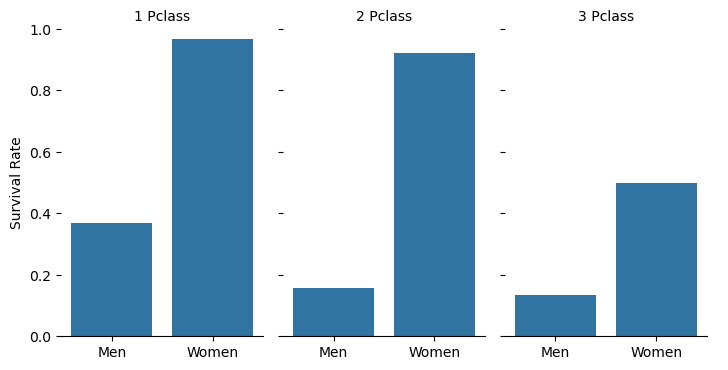

In [80]:
g = sns.catplot(
    data=df, x="Sex", y="Survived", col="Pclass",
    kind="bar", height=4, aspect=.6, errorbar=None
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> Family and Companionship </h2>
</div>

### Q11) Compare survival rates for passengers with SibSp > 0 vs SibSp = 0.

<Axes: xlabel='SibSp', ylabel='Survival rate (%)'>

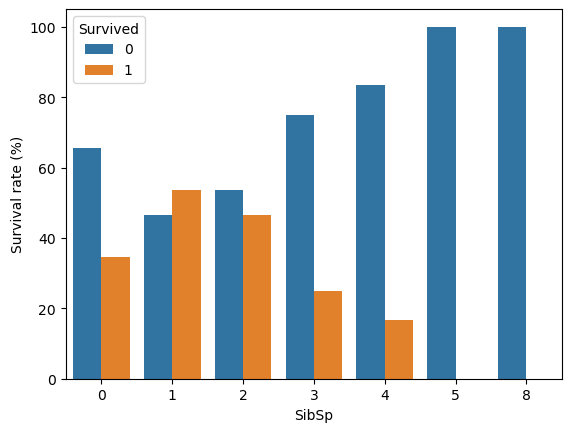

In [83]:
df_sibfilt = df[(df["SibSp"] > 0) | (df["SibSp"] == 0)]
df_sb = pd.crosstab(df_sibfilt["SibSp"], df["Survived"], normalize="index").mul(100).round(2).reset_index()
df_sb_melted = df_sb.melt(id_vars="SibSp", value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)")
sns.barplot(data=df_sb_melted, x="SibSp", y="Survival rate (%)", hue="Survived")

### Q12) Compare survival rates for passengers with Parch > 0 vs Parch = 0.

<Axes: xlabel='Parch', ylabel='Survival rate (%)'>

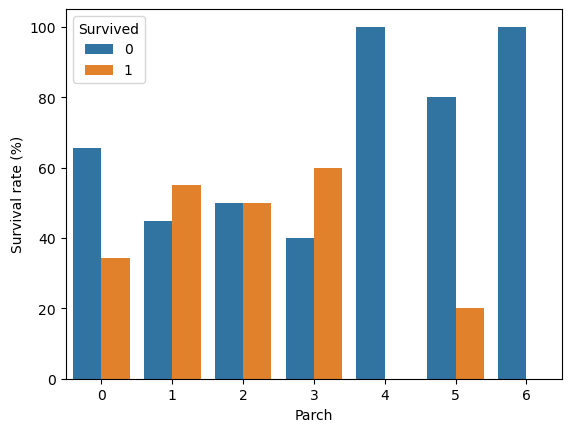

In [85]:
df_parchfilt = df[(df["Parch"] > 0) | (df["Parch"] == 0)]
df_parch = pd.crosstab(df_parchfilt["Parch"], df["Survived"], normalize="index").mul(100).round(2).reset_index()
df_parch_melted = df_parch.melt(id_vars="Parch", value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)")
sns.barplot(data=df_parch_melted, x="Parch", y="Survival rate (%)", hue="Survived")

### Q13) Create a new column FamilySize = SibSp + Parch + 1. 
### Compare survival rates for FamilySize categories:

#### a. 1 (traveling alone),
#### b. 2–4 (small family),
#### c. 5+ (large family).

In [88]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Adult,2
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C,Adult,2
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,Child,4
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S,Adult,2
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,Adult,2


In [89]:
def nb_travelling(nb):
    if nb == 1:
        return "Alone"
    elif nb <= 4:
        return "Small"
    else:
        return "Large"

df["FamilySize"] = pd.Categorical(values=df["FamilySize"].apply(nb_travelling), categories=["Alone", "Small", "Large"])
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,Adult,Large
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C,Adult,Small
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S,Child,Small
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S,Adult,Alone
606,607,0,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S,Adult,Alone


In [90]:
df_ = pd.crosstab(df["FamilySize"], df["Survived"], normalize="index").mul(100).round(2).reset_index()
df_

Survived,FamilySize,0,1
0,Alone,69.65,30.35
1,Small,42.12,57.88
2,Large,83.87,16.13


In [91]:
df_melted = df_.melt(id_vars="FamilySize", value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)")
df_melted

,FamilySize,Survived,Survival rate (%)
0,Alone,0,69.65
1,Small,0,42.12
2,Large,0,83.87
3,Alone,1,30.35
4,Small,1,57.88
5,Large,1,16.13


<Axes: xlabel='FamilySize', ylabel='Survival rate (%)'>

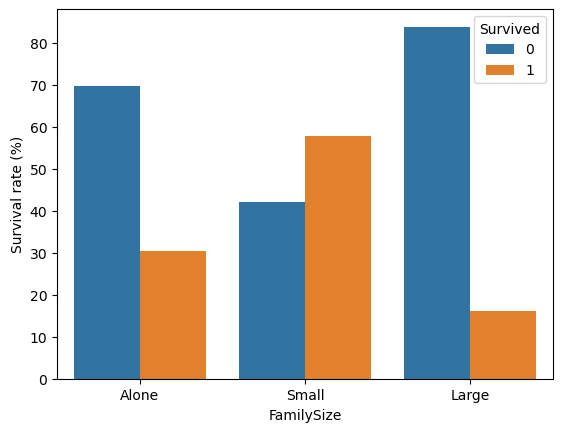

In [92]:
sns.barplot(data=df_melted, x="FamilySize", y="Survival rate (%)", hue="Survived")

<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> Socio-Economic Factors </h2>
</div>

### Q14) Compare the average fare across classes (Pclass = 1, 2, 3).

In [96]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize
692,693,1,3,"Lam, Mr. Ali",male,28.0,0,0,1601,56.4958,NaN,S,Adult,Alone
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S,Adult,Alone
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S,Adult,Alone
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S,Adult,Alone
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C,Adult,Small


In [97]:
d1 = df[df["Pclass"]==1]
m1 = d1["Fare"].mean().round(2)
m1

84.15

In [98]:
d2 = df[df["Pclass"]==2]
m2 = d2["Fare"].mean().round(2)
m2

20.66

In [99]:
d3 = df[df["Pclass"]==3]
m3 = d3["Fare"].mean().round(2)
m3

13.68

In [100]:
df.groupby(by="Pclass")["Fare"].mean().round(2)

Pclass
1    84.15
2    20.66
3    13.68
Name: Fare, dtype: float64

### Q15) Categorize passengers into Fare Groups:
#### •Low: \$0–\$10
#### •Lower-Mid: \$10–\$30
#### •Mid: \$30–\$60
#### •Upper-Mid: \$60–\$100
#### •High: \$100–\$200
#### •Very High: \$200+
### Compare survival rates across these fare groups.

In [102]:
def fare_grp(fare):
    if fare <= 10:
        return "Low"
    elif fare <= 30:
        return "Lower-Mid"
    elif fare <= 60:
        return "Mid"
    elif fare <= 100:
        return "Upper-Mid"
    elif fare <= 200:
        return "High"
    else:
        return "Very High"

df["FareGroup"] = pd.Categorical(values=df["Fare"].apply(fare_grp), categories=["Low", "Lower-Mid", "Mid", "Upper-Mid", "High", "Very High"])
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,FareGroup
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C,Adult,Alone,Low
264,265,0,3,"Henry, Miss. Delia",female,28.0,0,0,382649,7.7500,NaN,Q,Adult,Alone,Low
168,169,0,1,"Baumann, Mr. John D",male,28.0,0,0,PC 17318,25.9250,NaN,S,Adult,Alone,Lower-Mid
552,553,0,3,"O'Brien, Mr. Timothy",male,28.0,0,0,330979,7.8292,NaN,Q,Adult,Alone,Low
692,693,1,3,"Lam, Mr. Ali",male,28.0,0,0,1601,56.4958,NaN,S,Adult,Alone,Mid


<Axes: xlabel='FareGroup', ylabel='Survival rate (%)'>

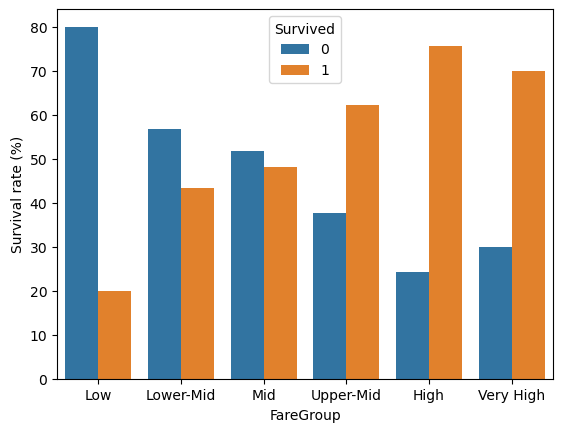

In [103]:
df_fgrp = pd.crosstab(df["FareGroup"], df["Survived"], normalize="index").mul(100).round(2).reset_index()
df_fgrp_melted = df_fgrp.melt(id_vars="FareGroup", value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)")
sns.barplot(data=df_fgrp_melted, x="FareGroup", y="Survival rate (%)", hue="Survived")

### Q16) Within each class, check whether passengers who paid higher fares had higher survival odds.

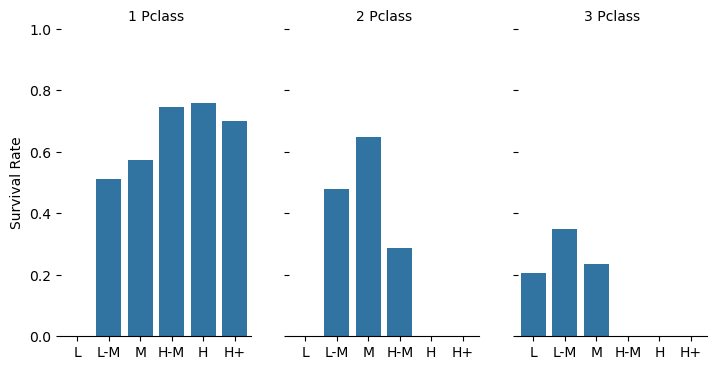

In [202]:
g = sns.catplot(
    data=df, x="FareGroup", y="Survived", col="Pclass",
    kind="bar", height=4, aspect=.6, errorbar=None
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["L", "L-M", "M", "H-M", "H", "H+"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> Demographics </h2>
</div>

In [259]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,FareGroup
694,695,0,1,"Weir, Col. John",male,60.00,0,0,113800,26.5500,NaN,S,Senior,Alone,Lower-Mid
64,65,0,1,"Stewart, Mr. Albert A",male,28.00,0,0,PC 17605,27.7208,NaN,C,Adult,Alone,Lower-Mid
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Child,Small,Lower-Mid
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,Child,Small,High
514,515,0,3,"Coleff, Mr. Satio",male,24.00,0,0,349209,7.4958,NaN,S,Adult,Alone,Low


### Q17) Compute the average age of passengers in each class (Pclass). Compare to the overall mean age.

In [218]:
df.groupby(by="Pclass")["Age"].mean().round(0).reset_index()

,Pclass,Age
0,1,37.0
1,2,30.0
2,3,26.0


In [230]:
mean_age = df["Age"].mean()
df.groupby(by="Pclass")["Age"].mean().div(mean_age).mul(100).round(2).reset_index(name="Deviation from age mean")
print(f"The overall mean age is {mean_age.round(0)} y.o. for reference")

The overall mean age is 29.0 y.o. for reference


### Q18) Extract Title from the Name column and assign passengers into these groups:
#### • Commoners: Mr, Mrs, Miss, Ms, Mme, Mlle, Master
#### • Nobility: Lady, Sir, the Countess, Jonkheer, Don
#### • Professionals: Dr, Rev, Col, Major, Capt
### Compare survival rates across these three title groups.

In [266]:
def assign_title(name):
    if ("Mr" in name) or ("Mrs" in name) or ("Miss" in name) or ("Ms" in name) or ("Mme" in name) or ("Mlle" in name) or ("Master" in name):
        return "Commoners"
    elif ("Lady" in name) or ("Sir" in name) or ("the Countess" in name) or ("Jonkheer" in name) or ("Don" in name):
        return "Nobility"
    else:
        return "Professionals"

In [264]:
df["TitleGroup"] = pd.Categorical(values=df["Name"].apply(assign_title), categories=["Commoners", "Nobility", "Professionals"])
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,FareGroup,TitleGroup
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q,Adult,Alone,Low,Commoners
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S,Adult,Alone,Lower-Mid,Commoners
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,Adult,Alone,Low,Commoners
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C,Adult,Small,High,Commoners
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.7750,NaN,S,Adult,Alone,Low,Commoners


<Axes: xlabel='TitleGroup', ylabel='Survival rate (%)'>

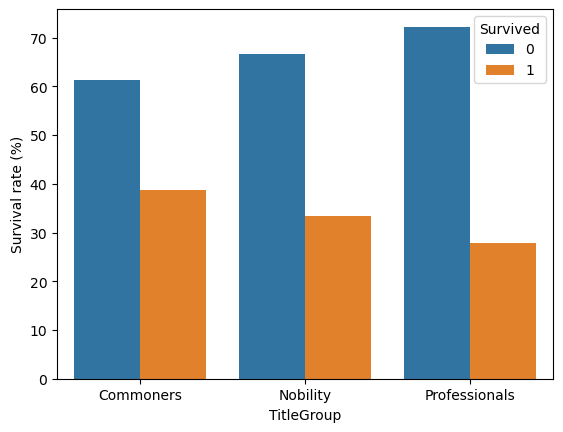

In [268]:
df_tgrp = pd.crosstab(df["TitleGroup"], df["Survived"], normalize="index").mul(100).round(2).reset_index()
df_tgrp_melted = df_tgrp.melt(id_vars="TitleGroup", value_vars=[0, 1], var_name="Survived", value_name="Survival rate (%)")
sns.barplot(data=df_tgrp_melted, x="TitleGroup", y="Survival rate (%)", hue="Survived")

### Q19) Compare the distribution of Age across different classes (Pclass = 1, 2, 3).

Pclass = 1
Pclass = 2
Pclass = 3


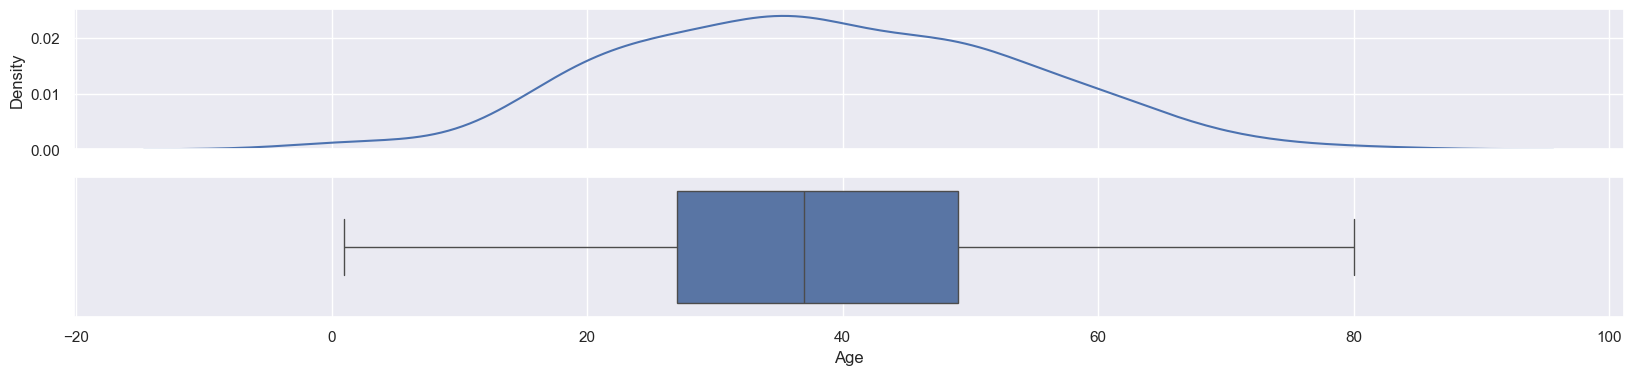

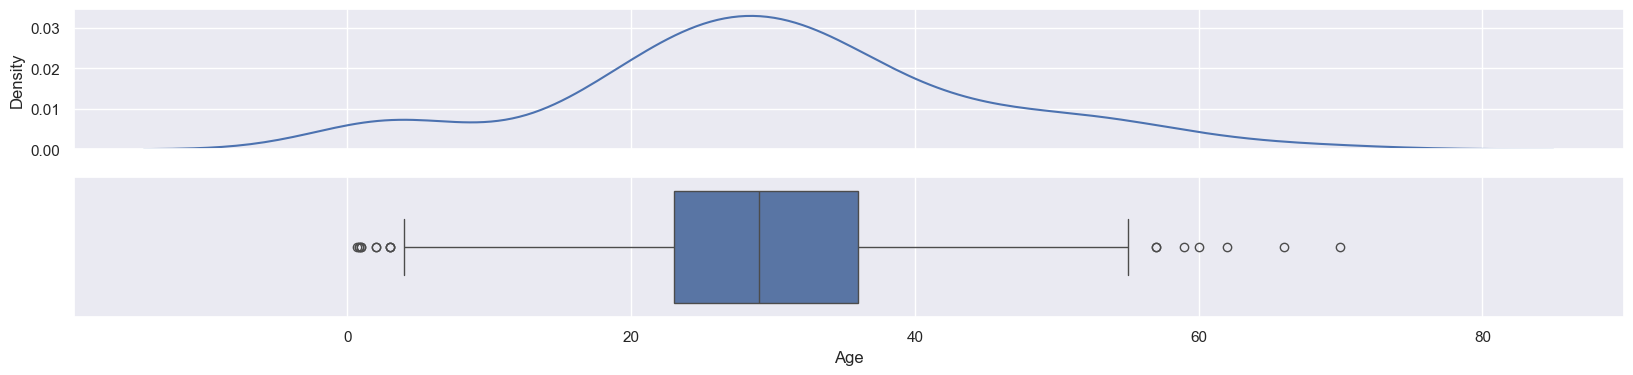

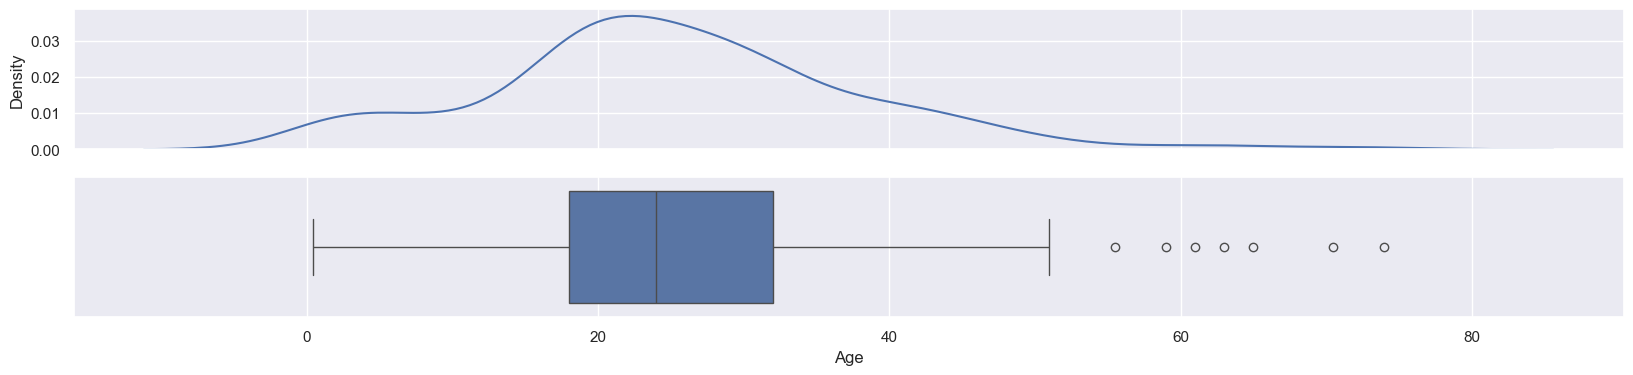

In [289]:
for nclass in range(1,4):
    df_pAge = df[df["Pclass"] == nclass]
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 4))
    sns.kdeplot(data=df_pAge, x="Age", ax=ax[0])
    sns.boxplot(data=df_pAge, x="Age", ax=ax[1])
    print(f"Pclass = {nclass}")

### Q20) Compare the distribution of Age across embarkation ports (Embarked = C, Q, S).

Embarked at C
Embarked at Q
Embarked at S


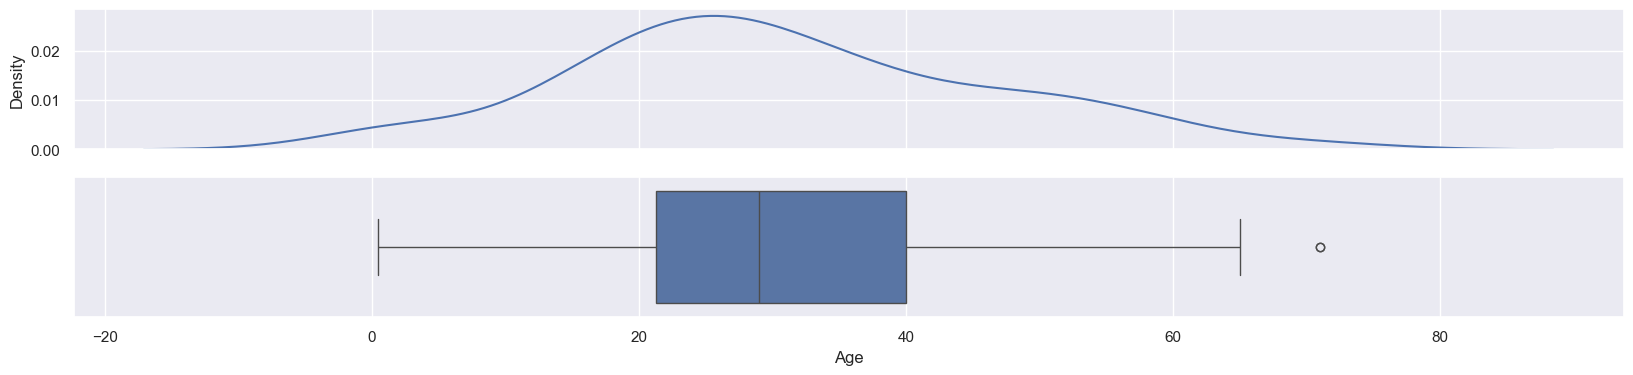

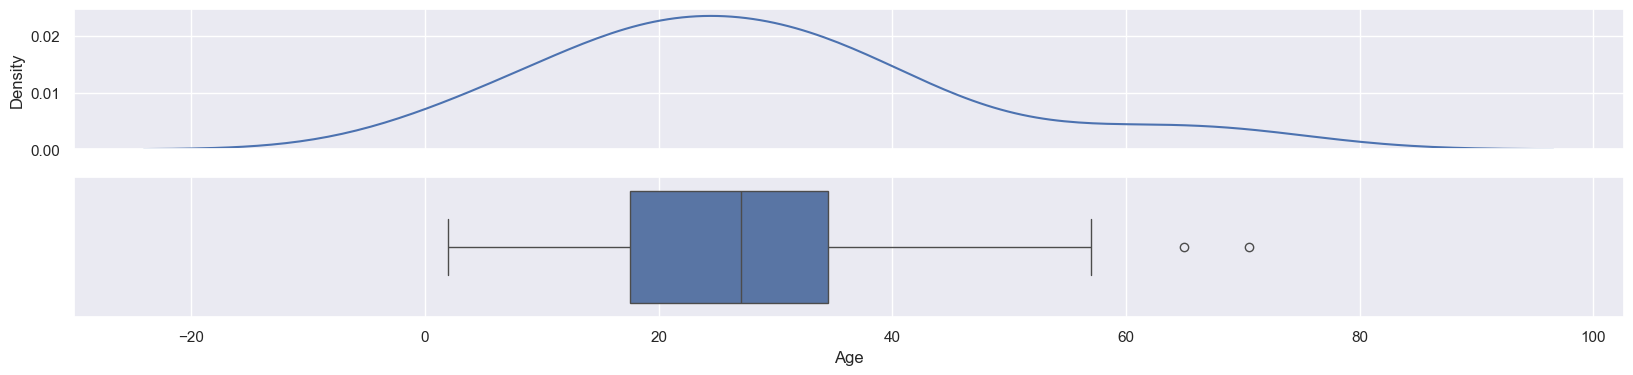

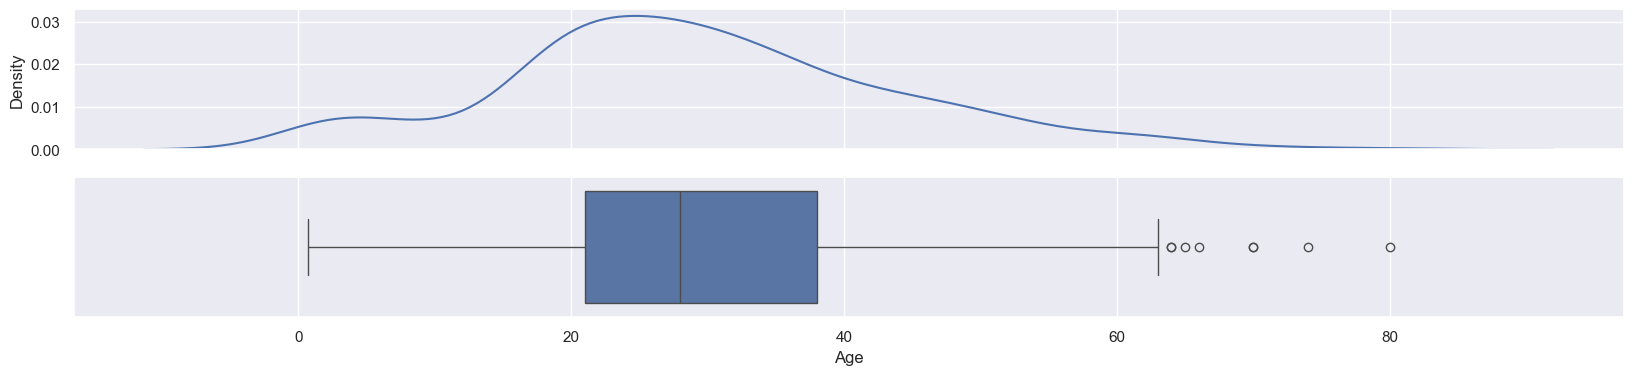

In [292]:
for port in ["C", "Q", "S"]:
    df_portAge = df[df["Embarked"] == port]
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 4))
    sns.kdeplot(data=df_portAge, x="Age", ax=ax[0])
    sns.boxplot(data=df_portAge, x="Age", ax=ax[1])
    print(f"Embarked at {port}")